In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv("classification.csv")

In [5]:
dataset.head(10)

,x1,x2,label
0,0.448196,0.130705,0.0
1,0.773273,0.086142,0.0
2,0.418814,0.634072,1.0
3,0.951985,0.403000,0.0
4,0.628209,0.040618,0.0
5,0.248861,0.241430,1.0
6,0.768037,0.216489,0.0
7,0.482404,0.308344,1.0
8,0.746939,0.805783,1.0
9,0.373585,0.268571,1.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      200 non-null    float64
 1   x2      200 non-null    float64
 2   label   200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


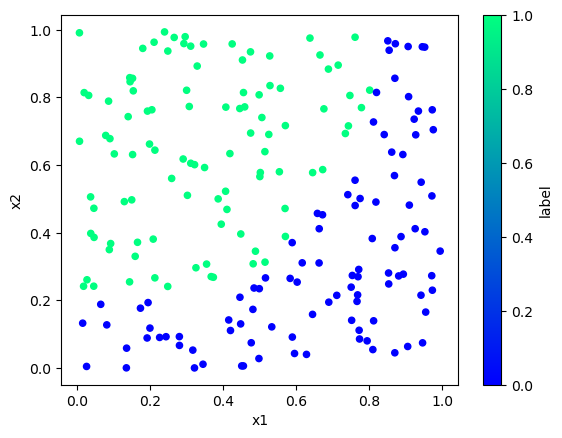

In [11]:
dataset.plot.scatter(x='x1', y="x2", c="label", colormap="winter")
plt.show()

    ### modele de regression

In [13]:
from sklearn.linear_model import LogisticRegression

X = dataset[['x1', 'x2']].values
y = dataset[['label']].values

In [15]:
print(y[:5])
y = y.ravel()
print(y[:5])

[[0.]
 [0.]
 [1.]
 [0.]
 [0.]]
[0. 0. 1. 0. 0.]


In [17]:
log = LogisticRegression()
log.fit(X, y)

LogisticRegression()

In [18]:
y_pred = log.predict(X)

In [19]:
y_pred

array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.])

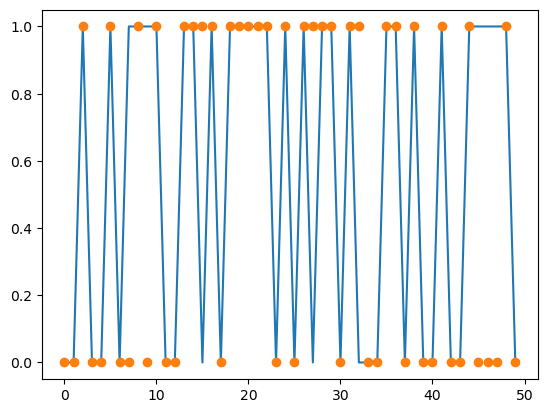

In [22]:
n = 50
plt.plot(y[:n])
plt.plot(y_pred[:n], 'o ')
plt.show()

In [23]:
print(log.coef_, log.intercept_)

[[-4.10749984  3.97795939]] [0.15829959]


### calcul taux de prédiction

In [24]:
s = log.score(X, y)
s

0.865

In [37]:
b = log.intercept_[0]
w1 = log.coef_[0, 0]
w2 = log.coef_[0, 1]

print(b, w1, w2)

x1 = X[:, 0]
x2 = -(b+w1*x1)/w2
x2[:10]

0.15829959059318008 -4.107499844418825 3.9779593852588326


array([0.4229972 , 0.7586601 , 0.39265858, 0.94319169, 0.60887228,
       0.21717081, 0.75325401, 0.45831918, 0.73146906, 0.34595622])

In [41]:
x_pos = np.array([[x[0], x[1]] for x in dataset.values if x[2] >= 0.5])
x_neg = np.array([[x[0], x[1]] for x in dataset.values if x[2] <= 0.5])

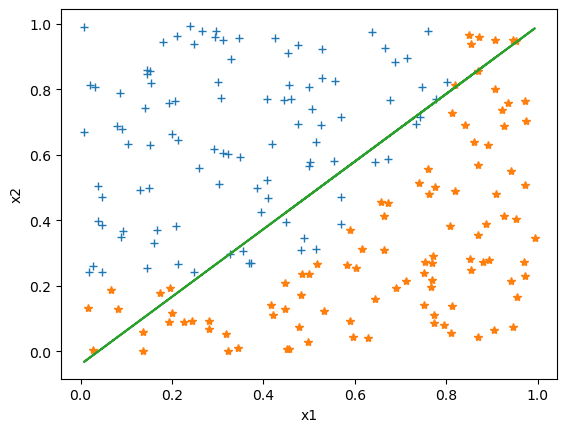

In [47]:
plt.plot(x_pos[:,0], x_pos[:,1], '+')
plt.plot(x_neg[:,0], x_neg[:,1], '*')
plt.plot(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

[1.]


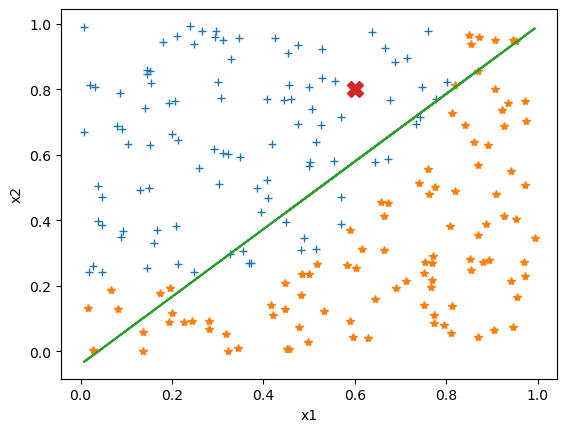

In [55]:
x_test = [0.6, 0.8]
y_pred = log.predict([[x_test[0], x_test[1]]])
print(y_pred)

plt.plot(x_pos[:,0], x_pos[:,1], '+')
plt.plot(x_neg[:,0], x_neg[:,1], '*')
plt.plot(x1, x2)
plt.plot(x_test[0], x_test[1], 'X', markersize=12)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()